In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn')
%matplotlib inline

In [29]:
from instahack_api import *

In [2]:
with open('all_posts_3.json', 'r') as fp:
    json_posts = json.load(fp)

In [33]:
with open('following_users.json', 'r') as fp:
    following_users = json.load(fp)
user_infos = {user['username']: user for user in following_users}

In [3]:
posts = pd.DataFrame(data=json_posts)

In [4]:
def get_hashtags(post):
    caption = post['text'] if post and 'text' in post else ''
    words = caption.split()
    hashtags = []
    for word in words:
        if len(word) > 0 and word[0] == '#':
            hashtags += word.split('#')[1:]
    return hashtags
            

In [5]:
posts['hashtags'] = posts['caption'].map(get_hashtags)

In [6]:
posts['num_hashtags'] = posts['hashtags'].map(len)

In [7]:
posts['username'] = posts['user'].map(lambda x: x['username'])

In [35]:
posts['user_info'] = posts['username'].map(lambda un: user_infos[un] if un in user_infos else None)

In [43]:
posts['user_followers'] = posts['user_info'].map(lambda user: user['follower_count'] if user and 'follower_count' in user else 0)

In [47]:
posts['log_followers'] = posts['user_followers'].map(lambda x: math.log(x,10) if x > 0 else 0)

In [36]:
posts.columns

Index(['taken_at', 'pk', 'id', 'device_timestamp', 'media_type', 'code',
       'client_cache_key', 'filter_type', 'image_versions2', 'original_width',
       'original_height', 'user', 'can_viewer_reshare', 'caption_is_edited',
       'direct_reply_to_author_enabled', 'comment_likes_enabled',
       'comment_threading_enabled', 'has_more_comments',
       'max_num_visible_preview_comments', 'preview_comments',
       'can_view_more_preview_comments', 'comment_count',
       'inline_composer_display_condition', 'inline_composer_imp_trigger_time',
       'like_count', 'has_liked', 'top_likers', 'facepile_top_likers',
       'photo_of_you', 'usertags', 'caption', 'can_viewer_save',
       'organic_tracking_token', 'carousel_media_count', 'carousel_media',
       'can_see_insights_as_brand', 'next_max_id', 'location', 'lat', 'lng',
       'video_versions', 'has_audio', 'video_duration', 'view_count', 'likers',
       'is_dash_eligible', 'video_dash_manifest', 'video_codec',
       'number

In [9]:
list(filter(lambda x: 'video' in x, posts.columns))

['video_versions', 'video_duration', 'video_dash_manifest', 'video_codec']

In [40]:
posts.sort_values('like_count', ascending=False)['user_info'][0]

{'pk': 1947743688,
 'username': 'happyoctopuses',
 'full_name': 'Akeylah 🐙',
 'is_private': False,
 'profile_pic_url': 'https://instagram.fsjc1-3.fna.fbcdn.net/vp/7daa09382d2b47684382c4c1c8b3ae99/5E7C19EC/t51.2885-19/s150x150/13117974_172294036501192_876402105_a.jpg?_nc_ht=instagram.fsjc1-3.fna.fbcdn.net',
 'profile_pic_id': '1243581631356838970_1947743688',
 'is_verified': False,
 'has_anonymous_profile_picture': False,
 'media_count': 149,
 'geo_media_count': 0,
 'follower_count': 143,
 'following_count': 501,
 'following_tag_count': 0,
 'biography': 'Just a strange girl trying to make it in this strange world',
 'biography_with_entities': {'raw_text': 'Just a strange girl trying to make it in this strange world',
  'entities': []},
 'external_url': '',
 'total_igtv_videos': 0,
 'usertags_count': 30,
 'is_favorite': True,
 'is_favorite_for_stories': False,
 'live_subscription_status': 'all',
 'has_recommend_accounts': False,
 'has_chaining': True,
 'hd_profile_pic_versions': [{'width

In [11]:
posts['log_likes'] = posts['like_count'].map(lambda x: math.log(x,10) if x > 0 else 0)

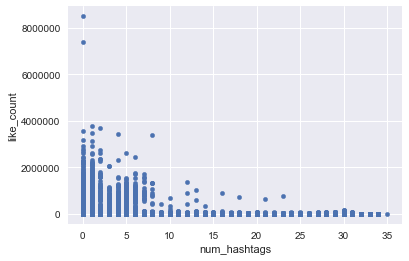

In [12]:
posts.plot.scatter(x='num_hashtags', y='like_count')

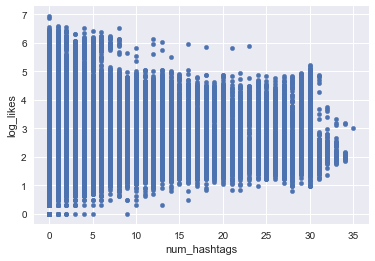

In [13]:
posts.plot.scatter(x='num_hashtags', y='log_likes')

(1, 10000000)

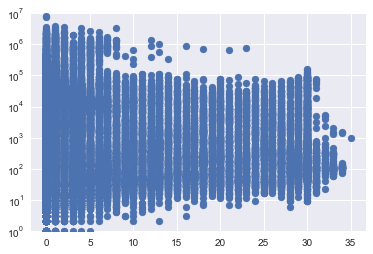

In [14]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(posts['num_hashtags'], posts['like_count'])
ax.set_yscale('log')
ax.set_ylim(1, 10**7)

In [15]:
lots_of_hashtags = posts[posts.num_hashtags > 10]
few_hashtags = posts[posts.num_hashtags <= 10]

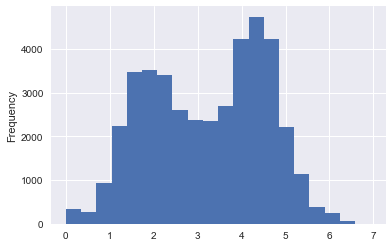

In [16]:
posts.log_likes.plot.hist(bins=20)

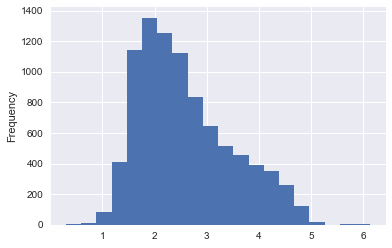

In [17]:
lots_of_hashtags.log_likes.plot.hist(bins=20)

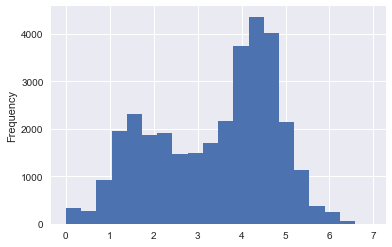

In [18]:
few_hashtags.log_likes.plot.hist(bins=20)

In [19]:
def media_type_name(num):
    if num == 1:
        return 'photo'
    elif num == 2:
        return 'video'
    elif num == 8:
        return 'carousel'
    else:
        return str(num)

In [20]:
posts['media_type_2'] = posts['media_type'].apply(media_type_name)

In [21]:
grouped = posts[['media_type_2', 'log_likes']].groupby('media_type_2')
photos = grouped.get_group('photo')
videos = grouped.get_group('video')
carousel = grouped.get_group('carousel')

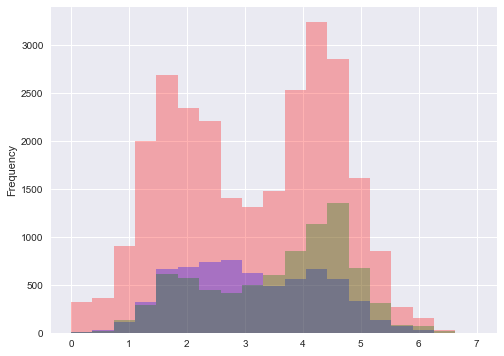

In [22]:
bins = np.linspace(0, 7, 20)

fig, ax = plt.subplots(figsize=(8,6))
photos['log_likes'].plot.hist(ax=ax, bins=bins, color='red', alpha=0.3)
videos['log_likes'].plot.hist(ax=ax, bins=bins, color='blue', alpha=0.3)
carousel['log_likes'].plot.hist(ax=ax, bins=bins, color='green', alpha=0.3)

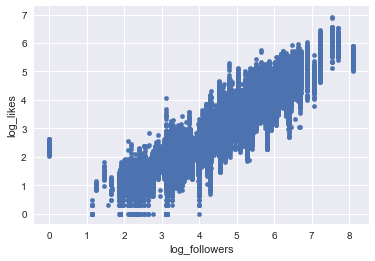

In [49]:
posts.plot.scatter(x='log_followers', y='log_likes')

In [50]:
few_followers = posts[posts['log_followers'] < 4.1]
many_followers = posts[posts['log_followers'] >= 4.1]

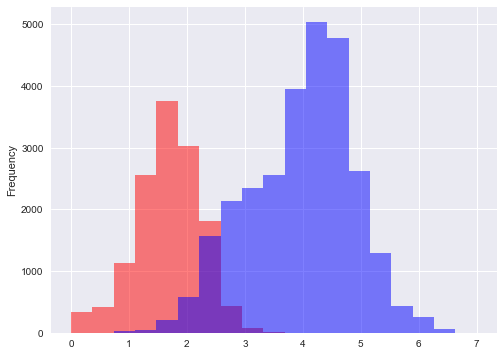

In [52]:
bins = np.linspace(0, 7, 20)

fig, ax = plt.subplots(figsize=(8,6))
few_followers['log_likes'].plot.hist(ax=ax, bins=bins, color='red', alpha=0.5)
many_followers['log_likes'].plot.hist(ax=ax, bins=bins, color='blue', alpha=0.5)


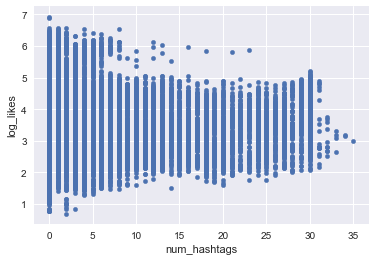

In [53]:
many_followers.plot.scatter(x='num_hashtags', y='log_likes')

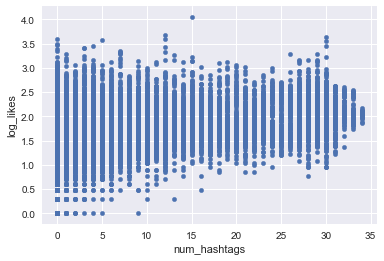

In [54]:
few_followers.plot.scatter(x='num_hashtags', y='log_likes')

In [55]:
grouped = few_followers[['media_type_2', 'log_likes']].groupby('media_type_2')
photos = grouped.get_group('photo')
videos = grouped.get_group('video')
carousel = grouped.get_group('carousel')

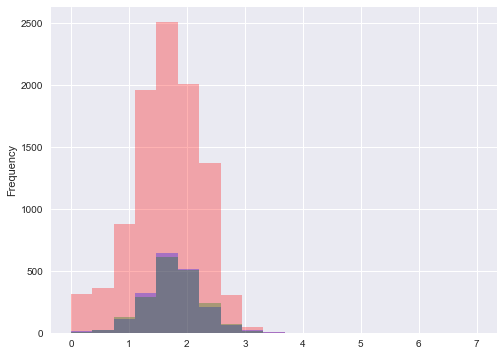

In [56]:
bins = np.linspace(0, 7, 20)

fig, ax = plt.subplots(figsize=(8,6))
photos['log_likes'].plot.hist(ax=ax, bins=bins, color='red', alpha=0.3)
videos['log_likes'].plot.hist(ax=ax, bins=bins, color='blue', alpha=0.3)
carousel['log_likes'].plot.hist(ax=ax, bins=bins, color='green', alpha=0.3)

In [31]:
get_username_info('happyoctopuses')

{'pk': 1947743688,
 'username': 'happyoctopuses',
 'full_name': 'Akeylah 🐙',
 'is_private': False,
 'profile_pic_url': 'https://instagram.fsjc1-3.fna.fbcdn.net/vp/7daa09382d2b47684382c4c1c8b3ae99/5E7C19EC/t51.2885-19/s150x150/13117974_172294036501192_876402105_a.jpg?_nc_ht=instagram.fsjc1-3.fna.fbcdn.net',
 'profile_pic_id': '1243581631356838970_1947743688',
 'is_verified': False,
 'has_anonymous_profile_picture': False,
 'media_count': 149,
 'geo_media_count': 0,
 'follower_count': 143,
 'following_count': 501,
 'following_tag_count': 0,
 'biography': 'Just a strange girl trying to make it in this strange world',
 'biography_with_entities': {'raw_text': 'Just a strange girl trying to make it in this strange world',
  'entities': []},
 'external_url': '',
 'total_igtv_videos': 0,
 'usertags_count': 30,
 'is_favorite': True,
 'is_favorite_for_stories': False,
 'live_subscription_status': 'all',
 'has_recommend_accounts': False,
 'has_chaining': True,
 'hd_profile_pic_versions': [{'width